# Sportsbetting data analysis 

In [1]:
import pandas as pd 
import matplotlib.pyplot as plt
import numpy as np

In [2]:
file_path = "data_analyst_task.xlsx"
xls = pd.ExcelFile(file_path)
print(xls.sheet_names)

['Data Dictionary', 'Customer Bet Data', 'Customer Data']


In [3]:
# Load individual sheets to dataframes 
data_dict = pd.read_excel(xls, sheet_name='Data Dictionary')
bets_df = pd.read_excel(xls, sheet_name='Customer Bet Data')
customers_df = pd.read_excel(xls, sheet_name='Customer Data')

In [4]:
# Printing shape to get overview/ confirm correct loading
print("\n=== SHAPE ===")
print(f"Data Dictionary shape: {data_dict.shape}")
print(f"Customer Bet Data shape: {bets_df.shape}")
print(f"Customer Data shape: {customers_df.shape}")


=== SHAPE ===
Data Dictionary shape: (20, 2)
Customer Bet Data shape: (765299, 11)
Customer Data shape: (40000, 5)


## Reading in additional information on datasets 

In [5]:
pd.set_option('display.max_colwidth', None)
display(data_dict.head(20))
pd.reset_option('display.max_colwidth') # Returning to normal for later reading in

,Column Name,Description
0,month,"The month that a bet was settled, format YYYY-MM"
1,account_id,The unique identifier for an account
2,sport_name,The name of the sport a bet was placed on
3,in_play_yn,Y/N flag indicating whether a bet was placed on an event that was in-play at the time of placement
4,freebet_used_yn,Y/N flag indicating whether at least part of the amount placed on the bet was from a free bet
5,bet_type,"The type of bet placed. Single - only one selection included in the bet, Multiple - more than one selection included in the bet"
6,max_bet_yn,Y/N flag indicating whether the amount placed on the bet was >80% of the maximum amount allowed. The maximum value can differ by customer
7,market_group,"The market type a bet was placed on, this differs by sport"
8,stakes,Total monetary amount placed (in GBP)
9,revenue,Total revenue earned by the business (in GBP)


## Checking customer data integrity 

Checking data types, for duplicates/missing data and an overall summary.

In [6]:
customers_df.tail()

,account_id,marketing_channel,account_open_datetime,residence_country,sharp_yn
39995,39996,Direct,2016-04-09 11:58:22,United Kingdom,N
39996,39997,Direct,2018-10-15 16:47:43,United Kingdom,Y
39997,39998,Affiliates,2018-06-28 17:26:36,United Kingdom,N
39998,39999,PPC Brand,2018-06-23 09:29:33,United Kingdom,N
39999,40000,Affiliates,2018-04-12 12:37:41,United Kingdom,N


In [7]:
print("\nCustomer Data dtypes:")
print(customers_df.dtypes)


Customer Data dtypes:
account_id                        int64
marketing_channel                object
account_open_datetime    datetime64[ns]
residence_country                object
sharp_yn                         object
dtype: object


In [8]:
# Converting column types to optimise 
customers_df['sharp_yn'] = customers_df['sharp_yn'].astype('category')
customers_df['residence_country'] = customers_df['residence_country'].astype('category')
customers_df['marketing_channel'] = customers_df['marketing_channel'].astype('category')
customers_df['account_id'] = customers_df['account_id'].astype('int32')

print("\nUpdated Customer Data dtypes:")
print(customers_df.dtypes)


Updated Customer Data dtypes:
account_id                        int32
marketing_channel              category
account_open_datetime    datetime64[ns]
residence_country              category
sharp_yn                       category
dtype: object


In [9]:
print("\nCustomer Data missing values:")
print(customers_df.isnull().sum())


Customer Data missing values:
account_id               0
marketing_channel        0
account_open_datetime    0
residence_country        0
sharp_yn                 0
dtype: int64


In [10]:
print("\nCustomer Data duplicate values:")
customers_df.duplicated().sum()


Customer Data duplicate values:


0

In [11]:
sport_counts = bets_df['sport_name'].value_counts()
print(sport_counts)

sport_name
Soccer               433908
Horse Racing         211816
Golf                  30074
Tennis                21053
Rugby Union           17243
Darts                 11501
Basketball            11466
American Football     10473
Greyhound Racing      10405
Cricket                6815
(null)                  545
Name: count, dtype: int64


In [12]:
# Dropping the null values and any NaNs

bets_df = bets_df[bets_df['sport_name'] != '(null)']
bets_df = bets_df.dropna(subset=['sport_name'])
revised_sport_counts = bets_df['sport_name'].value_counts()
print(revised_sport_counts)

sport_name
Soccer               433908
Horse Racing         211816
Golf                  30074
Tennis                21053
Rugby Union           17243
Darts                 11501
Basketball            11466
American Football     10473
Greyhound Racing      10405
Cricket                6815
Name: count, dtype: int64


In [13]:
print("\nCustomer Data summary:")
print(customers_df.describe(include='all'))


Customer Data summary:
         account_id marketing_channel          account_open_datetime  \
count   40000.00000             40000                          40000   
unique          NaN                11                            NaN   
top             NaN            Direct                            NaN   
freq            NaN             13662                            NaN   
mean    20000.50000               NaN     2015-10-15 20:01:37.732000   
min         1.00000               NaN            1997-04-30 23:00:00   
25%     10000.75000               NaN  2014-04-05 14:40:55.750000128   
50%     20000.50000               NaN     2017-03-14 10:52:49.500000   
75%     30000.25000               NaN            2018-04-14 12:54:11   
max     40000.00000               NaN            2018-12-31 15:05:48   
std     11547.14972               NaN                            NaN   

       residence_country sharp_yn  
count              40000    40000  
unique                72        2  
top

### Initial notes and insights on customer data 

1. No duplicates or missing values found. 
2. Each row represents a unique customer account, with 40,000 altogether.
3. A wide range of opening dates are visible, beginning in 1997. Therefore, I have a mix of old and new customers, which could offer insight on betting tendencies, profitability etc. This might need segmenting by tenure, as most have joined in recent years.
4. The vast majority of customers are from the UK. I could compare UK vs non-UK customer activities (betting behaviour etc) but may have to filter out countries with exceedingly small amounts of users. 
5. On marketing channel, there are 11 options with direct being most common. Channel vs profitability etc could be interesting to explore. Could segment these by channel.
6. A quarter of users are marked as sharp. Their betting trends could be explored, such as what sports they bet on, whether their revenue per bet is lower etc.

## Additional processing on customer data 

### Country trends

In [14]:
# Checking the percentage count of users by country 
country_counts = customers_df['residence_country'].value_counts(normalize=True) * 100
print(country_counts)

residence_country
United Kingdom                                   81.5025
Ireland                                          14.9850
Russian Federation                                0.7425
Ukraine                                           0.4175
Sweden                                            0.2500
                                                  ...   
Qatar                                             0.0025
Netherlands Antilles                              0.0025
Macao, Special Administrative Region of China     0.0025
Andorra                                           0.0025
Oman                                              0.0025
Name: proportion, Length: 72, dtype: float64


In [15]:
# Keeping the specific country if it is UK or Ireland
# Otherwise, collating them as 'Other' due to the significantly low values in the dataset

customers_df['country_group'] = customers_df['residence_country'].apply(lambda x: x if x in ['United Kingdom', 'Ireland'] else 'Other')

country_group_counts = customers_df['country_group'].value_counts(normalize=True) * 100
print(country_group_counts)

country_group
United Kingdom    81.5025
Ireland           14.9850
Other              3.5125
Name: proportion, dtype: float64


The market is heaviy UK focused, with Ireland representing a significant minority. The 'other' countries likely have lower overall impact. 

Most analysis should focus on the UK, since it dominates the dataset. But Ireland, as a secondary market, deserves attention as there may be additional trends at play. Other may be excluded as the small size may make it difficult to spot trends. Additionally, as it is comprised of 70 countries, there are probably huge regional variations (among few players) at play.

In [16]:
# Checking what percentage of users from each country group are marked as sharp 
sharp_percent_by_country = customers_df.groupby("country_group")["sharp_yn"].apply(
    lambda x: (x == "Y").mean() * 100
).sort_values(ascending=False)

print(sharp_percent_by_country)

country_group
Other             93.736655
United Kingdom    25.048311
Ireland            8.625292
Name: sharp_yn, dtype: float64


The users from non-Ireland/UK countries are overwhelmingly sharp. This could be explored further: 
- may indicate targeted/fradulent accounts 
- sharp users may be utilising this platform from other jurisdictions 
- possible use of VPNs or similar 

Ireland and the UK make up the majority of users but show much lower sharp rates. Therefore, these may be the core recreational base. 

### Account opening years 

In [17]:
# Simplifying the exact timestamp value to respective columns for date and month, to allow for trend analysis without noise

customers_df['account_open_year'] = customers_df['account_open_datetime'].dt.year
customers_df['account_open_month'] = customers_df['account_open_datetime'].dt.month

print(customers_df[['account_open_datetime', 'account_open_year', 'account_open_month']].head())

  account_open_datetime  account_open_year  account_open_month
0   2015-03-19 18:41:41               2015                   3
1   2018-04-14 11:13:03               2018                   4
2   2015-04-11 09:35:37               2015                   4
3   2016-08-21 15:01:47               2016                   8
4   2006-10-05 19:25:48               2006                  10


In [18]:
# Exploring the spread of account opening dates (by year)

year_percentages = customers_df['account_open_year'].value_counts(normalize=True) * 100
print(year_percentages)

account_open_year
2018    38.0725
2017    14.9425
2016    11.3050
2015     7.0075
2014     6.5025
2012     4.2550
2013     4.2275
2011     3.4600
2010     2.7675
2009     1.6975
2008     1.4000
2007     1.0125
2006     1.0075
2005     0.5975
2002     0.4725
2004     0.4400
2003     0.3825
2001     0.2350
2000     0.1250
1997     0.0300
1998     0.0300
1999     0.0300
Name: proportion, dtype: float64


A large chunk of the accounts opened in 2018 (the year of the bets being placed). Therefore, there is a strong influx of new customers. 

Account openings drop steadily as you go back in years, indicating that older accounts are less active over time. 

The customer tenure is very skewed to new accounts. I could segment customers by tenure (2018 accounts vs earlier) to see if behaviour differs by how long they have been active. 

I could track growth trends; eg how did recent accounts perform as compared to existing customers. 

In [19]:
# Exploring the percentage of sharp accounts by opening year
counts = customers_df.groupby(['account_open_year', 'sharp_yn'], observed=True).size().unstack(fill_value=0)
counts['sharp_percent'] = counts['Y'] / (counts['Y'] + counts['N']) * 100

print(counts['sharp_percent'])

account_open_year
1997    25.000000
1998    25.000000
1999    16.666667
2000    28.000000
2001    43.617021
2002    53.968254
2003    32.026144
2004    36.363636
2005    28.870293
2006    26.054591
2007    24.197531
2008    25.714286
2009    24.889543
2010    21.951220
2011    20.736994
2012    19.623972
2013    18.687167
2014    17.800846
2015    22.297538
2016    25.939850
2017    25.079471
2018    27.559262
Name: sharp_percent, dtype: float64


Sharpness isn't concentrated in one age group of accounts, there are peaks and troughs.

Overall, the older accounts have a higher percentage of sharp bettors. It may show that long-term customers are sharper (perhaps through learning betting strategies over time).

Recent accounts still show a relatively high percentage of sharps, so they may be also quite savvy (or sharp bettors are joining actively).

There is a dip in sharpness from 2010 - 2015, which might indicate a different user base signing up at that time. 

In [20]:
# Breaking down yearly sharp percentages by country group

customers_df['sharp_flag'] = customers_df['sharp_yn'].map({'Y': 1, 'N': 0}).astype(int)
sharp_by_country_year = customers_df.groupby(['country_group', 'account_open_year'])['sharp_flag'].mean() * 100

sharp_pivot = sharp_by_country_year.reset_index().pivot(index='account_open_year', columns='country_group', values='sharp_flag')
sharp_pivot = sharp_pivot.round(2)

print(sharp_pivot)

country_group      Ireland   Other  United Kingdom
account_open_year                                 
1997                 25.00     NaN             NaN
1998                 25.00     NaN             NaN
1999                 16.67     NaN             NaN
2000                 12.50     NaN           90.00
2001                  7.14     NaN           73.08
2002                 17.39     NaN           65.73
2003                  5.77     NaN           45.54
2004                 10.42    0.00           46.46
2005                  9.59     NaN           37.35
2006                  8.90  100.00           35.55
2007                  9.27     NaN           33.07
2008                 13.30  100.00           31.44
2009                  9.78  100.00           29.36
2010                  7.35   60.00           25.90
2011                  6.97  100.00           23.99
2012                  6.53   91.67           22.42
2013                 10.05   92.31           20.46
2014                  7.35   81

There's a clear downward trend in UK sharp percentage - either new UK accounts are less likely to be flagged or sharp bettors are utilising old accounts. 

Ireland has the lowest sharp percentages overall (so Irish sharp bettors are either less prevalent or not consistently flagged). In Ireland, like the UK, the average rate of sharpness is trending downwards on younger accounts. 

Consistent high rate of sharpness in the 'Other' group. 

### Marketing channel information

In [21]:
# Checking the percentage count of marketing channels
channel_counts = customers_df['marketing_channel'].value_counts(normalize=True) * 100
print(channel_counts)

marketing_channel
Direct                  34.1550
Affiliates              18.4825
SEO                     16.3900
PPC Brand               15.5150
PPC (inc Competitor)     8.0775
Display                  2.9700
Social                   2.4525
Other                    1.5400
PPC ASA                  0.2625
RAE                      0.1450
PPC UAC                  0.0100
Name: proportion, dtype: float64


The largest share of customers are acquired directly (possibly indicating strong brand recognition?). Affiliates, SEO, paid search marketing and campaigns also seem profitable. 

From this, focus could be placed on the largest channels for retention/optimisation. Questions could be asked if smaller channels underperform (perhaps connecting here to revenue in the bets data)

In [22]:
# Checking sharp users by marketing channel 
sharp_by_channel = customers_df.groupby('marketing_channel', observed=True)['sharp_yn'].value_counts(normalize=True).unstack().fillna(0)
sharp_by_channel['Sharp %'] = sharp_by_channel['Y'] * 100
print(sharp_by_channel[['Sharp %']])

sharp_yn                Sharp %
marketing_channel              
Affiliates            38.874611
Direct                23.034695
Display                9.511785
Other                 22.727273
PPC (inc Competitor)   8.882699
PPC ASA               13.333333
PPC Brand             21.028037
PPC UAC               25.000000
RAE                   36.206897
SEO                   30.109823
Social                12.640163


Affiliates, RAE and SEO seem to be attracting more sharp bettors. Risk management may consider marketing channel as a factor, since sharp bettors behave differently. 

In [23]:
# Comparing the sharp percentage for each country group across the marketing channels
sharp_numeric = customers_df['sharp_yn'].map({'Y': 1, 'N': 0}).astype(float)

result = pd.crosstab(
    index=customers_df['marketing_channel'].astype(str),
    columns=customers_df['country_group'],
    values=sharp_numeric,
    aggfunc='mean'
) * 100

print(result)

country_group           Ireland       Other  United Kingdom
marketing_channel                                          
Affiliates            22.983871   92.608696       37.657267
Direct                 8.078751   95.017182       23.248470
Display                5.442177  100.000000       10.549944
Other                 12.698413         NaN       27.166276
PPC (inc Competitor)   3.496503   90.909091        8.839779
PPC ASA                0.000000  100.000000       12.621359
PPC Brand              7.931034   94.117647       22.936642
PPC UAC                     NaN         NaN       25.000000
RAE                    0.000000  100.000000       29.545455
SEO                    8.032787   92.647059       28.631052
Social                12.987013  100.000000       11.731844


Again, the sharp concentration in 'Other' countries is standing out clearly. Across each marketing channel, sharp users are heavily overrepresented. Users from 'other' countries represent an acquisition risk - they're nearly all sharp, no matter the channel.

Overall, Ireland tends to have lower sharp rates, possibly indicating a more recreational user base.

UK is a mixed bag: some channels are attracting sharp behaviour and others are not.  

Channel-level marketing may need scrutiny due to the range in sharp rates seen (Affiliate, direct and SEO). It's possible that different regions need different marketing strategies.

## Checking customer bet data integrity

In [24]:
bets_df.head()

,month,account_id,sport_name,in_play_yn,freebet_used_yn,bet_type,max_bet_yn,market_group,stakes,revenue,betcount
0,2018-03,26928,Horse Racing,N,N,Single,N,Derivative Markets,9.282234,9.282234,1
1,2018-07,710,Golf,N,N,Single,N,Outright,8.715135,8.715135,1
2,2018-11,12592,Soccer,N,N,Multiple,N,Match Odds,9.395684,9.395684,2
3,2018-11,349,Soccer,N,N,Single,Y,Commercial Specials,18.583440,18.583440,1
4,2018-11,15999,Soccer,N,N,Single,N,Over/Under Markets,16.669625,8.334812,2


In [25]:
print("\nBet dtypes:")
print(bets_df.dtypes)


Bet dtypes:
month               object
account_id           int64
sport_name          object
in_play_yn          object
freebet_used_yn     object
bet_type            object
max_bet_yn          object
market_group        object
stakes             float64
revenue            float64
betcount             int64
dtype: object


In [26]:
# Looking at how much memory will be saved by these conversions, as the dataset is so large 
mem_before = bets_df.memory_usage(deep=True).sum() / (1024**2) 
print(f"Memory usage before conversion: {mem_before:.2f} MB")

Memory usage before conversion: 306.46 MB


In [27]:
# Converting column types for optimisation 
bets_df['month'] = pd.to_datetime(bets_df['month'])

for col in ['in_play_yn', 'freebet_used_yn', 'max_bet_yn']:
    bets_df[col] = bets_df[col].map({'Y': True, 'N': False})

bets_df['account_id'] = bets_df['account_id'].astype('int32')
bets_df['betcount'] = bets_df['betcount'].astype('int32')

for col in ['sport_name', 'bet_type', 'market_group']:
    bets_df[col] = bets_df[col].astype('category')

bets_df['stakes'] = bets_df['stakes'].astype('float32')
bets_df['revenue'] = bets_df['revenue'].astype('float32')

print("\nUpdated Bet dtypes:")
print(bets_df.dtypes)


Updated Bet dtypes:
month              datetime64[ns]
account_id                  int32
sport_name               category
in_play_yn                   bool
freebet_used_yn              bool
bet_type                 category
max_bet_yn                   bool
market_group             category
stakes                    float32
revenue                   float32
betcount                    int32
dtype: object


In [28]:
mem_after = bets_df.memory_usage(deep=True).sum() / (1024**2) 
print(f"Memory usage after conversion: {mem_after:.2f} MB")

print(f"Memory reduced by: {mem_before - mem_after:.2f} MB ({100*(mem_before - mem_after)/mem_before:.1f}%)")

Memory usage after conversion: 27.72 MB
Memory reduced by: 278.74 MB (91.0%)


In [29]:
print("\nBets missing values:")
print(bets_df.isnull().sum())


Bets missing values:
month              0
account_id         0
sport_name         0
in_play_yn         0
freebet_used_yn    0
bet_type           0
max_bet_yn         0
market_group       0
stakes             0
revenue            0
betcount           0
dtype: int64


In [30]:
print("\nBets duplicate values:")
bets_df.duplicated().sum()


Bets duplicate values:


0

In [31]:
# Strip 'month' down to just month value for readability
bets_df['month'] = bets_df['month'].dt.strftime('%b')
print(bets_df.tail())

       month  account_id    sport_name  in_play_yn  freebet_used_yn  bet_type  \
765294   May       10882  Horse Racing       False            False    Single   
765295   May       13633        Soccer       False            False  Multiple   
765296   Jun       23934  Horse Racing       False            False    Single   
765297   Jun        7025  Horse Racing       False            False    Single   
765298   Jul       12425        Soccer        True            False  Multiple   

        max_bet_yn         market_group      stakes     revenue  betcount  
765294       False         Win/Each Way  126.995560 -209.500336        12  
765295       False  Other Match Betting    1.801772    1.801772         5  
765296       False         Win/Each Way   31.926514   21.379362        14  
765297       False         Win/Each Way  465.885498  -49.911327        45  
765298       False           Match Odds    0.736832    0.736832         8  


In [32]:
print("\nBetting data summary:")
print(bets_df.describe(include='all'))


Betting data summary:
         month     account_id sport_name in_play_yn freebet_used_yn bet_type  \
count   764754  764754.000000     764754     764754          764754   764754   
unique      12            NaN         10          2               2        2   
top        Jun            NaN     Soccer      False           False   Single   
freq     81658            NaN     433908     593971          661710   501361   
mean       NaN   19703.836985        NaN        NaN             NaN      NaN   
std        NaN   11416.654169        NaN        NaN             NaN      NaN   
min        NaN       1.000000        NaN        NaN             NaN      NaN   
25%        NaN   10125.000000        NaN        NaN             NaN      NaN   
50%        NaN   19654.000000        NaN        NaN             NaN      NaN   
75%        NaN   29347.000000        NaN        NaN             NaN      NaN   
max        NaN   40000.000000        NaN        NaN             NaN      NaN   

       max_bet_y

### Initial notes and insights on betting data 

1. Again, no missing or duplicate values. 
2. With the monthly data, could track betting trends across the calendar year (changes in sport popularity etc). 
3. 11 sport options, with soccer the most popular. Could explore which sports drive most revenue, which are riskiest. 
4. The yes/no values in in_play_yn, freebet_used_yn etc could explore whether in play, free bets etc are most profitable. Combining with the customer data, could explore what the 'sharp' users are utilising. 
5. The 49 different values in market_group could provide insight into which markets are profitable/ unprofitable (and this could tie back in to sport).
6. Stakes and revenue: could explore what is the distribution of this. Perhaps are some high-value customers driving higher revenue? 

With the scale of this dataset, it might need aggregating by account_id in order to provide useful insights. 

## Additional processing on bets data 

### Betting activity patterns over months 

In [33]:
# Snapshot of betting activity across the calendar year
month_order = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 
               'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']
bets_df['month'] = pd.Categorical(bets_df['month'], categories=month_order, ordered=True)

summary = bets_df.groupby('month', observed=True)[['stakes', 'revenue', 'betcount']].sum()
summary_formatted = summary.copy()
summary_formatted['stakes'] = summary_formatted['stakes'].apply(lambda x: f'{x/1_000_000:.1f}M')
summary_formatted['revenue'] = summary_formatted['revenue'].apply(lambda x: f'{x/1_000_000:.1f}M')
summary_formatted['betcount'] = summary_formatted['betcount'].apply(lambda x: f'{x:,}')

print(summary_formatted)

      stakes revenue betcount
month                        
Jan     1.6M    0.1M  165,803
Feb     4.0M    0.1M  473,480
Mar     6.2M    0.0M  621,291
Apr     5.8M    0.2M  622,055
May     5.5M    0.1M  438,237
Jun     5.8M    0.2M  548,201
Jul     6.1M    0.1M  491,893
Aug     5.8M    0.4M  508,053
Sep     6.2M    0.2M  494,732
Oct     6.0M    0.3M  481,148
Nov     6.4M   -0.1M  481,443
Dec     6.4M    0.3M  527,041


Betting volume (stakes and betcount) are rising from Jan - March/April and then staying high throughout the year. 

Revenue is positive in most months (except November). This doesn't always scale with stakes - stakes are highest in March but revenue is low. 

Generally speaking, the betcount is following the stakes (although this is not consistent - see February).

In [34]:
# Usage of free vs paid bets across the calendar year 

summary = bets_df.groupby(['month', 'freebet_used_yn'], observed=True)[['stakes', 'revenue']].sum().unstack()
summary.columns = [f'{metric}_{"Freebet" if fb else "Paid"}' for metric, fb in summary.columns]

summary_formatted = summary.copy()
for col in summary_formatted.columns:
    summary_formatted[col] = summary_formatted[col].apply(lambda x: f'{x/1_000_000:.2f}M' if 'stakes' in col or 'revenue' in col else x)

print(summary_formatted)

      stakes_Paid stakes_Freebet revenue_Paid revenue_Freebet
month                                                        
Jan         1.60M          0.04M        0.14M           0.01M
Feb         3.94M          0.09M        0.08M           0.02M
Mar         6.03M          0.18M        0.00M           0.04M
Apr         5.69M          0.15M        0.13M           0.03M
May         5.31M          0.15M        0.06M           0.03M
Jun         5.63M          0.19M        0.19M           0.04M
Jul         5.91M          0.17M        0.10M           0.04M
Aug         5.58M          0.18M        0.33M           0.04M
Sep         6.02M          0.14M        0.19M           0.03M
Oct         5.84M          0.15M        0.25M           0.02M
Nov         6.24M          0.15M       -0.07M           0.02M
Dec         6.23M          0.19M        0.30M           0.03M


Free bet stakes are quite small (and consistently lower than paid bets). They might be used as a promotional tool. In most months, **free bets are generating revenue** (although lower than the paid bets). Interestingly, in a couple of instances (March), they are actually generating more revenue than paid bets. 

**March and November are outliers** here - paid bets having near-zero revenue but there were paid stakes. Maybe this indicates poor margins, high payouts or unusual betting behaviours. November in particular is showing negative revenue.

The **free bets are returning a higher percent of revenue** (10-20) than paid (1-3). Free bets seem to be well targeted and cost effective - low stake volumes. 

In [35]:
# Max bet usage across the calendar year 

percentage_counts = bets_df.groupby('month', observed=True)['max_bet_yn'].value_counts(normalize=True).unstack(fill_value=0) * 100
print(percentage_counts.round(2))

max_bet_yn  False  True 
month                   
Jan         94.73   5.27
Feb         94.18   5.82
Mar         94.65   5.35
Apr         95.12   4.88
May         93.93   6.07
Jun         95.42   4.58
Jul         95.48   4.52
Aug         93.88   6.12
Sep         93.44   6.56
Oct         93.39   6.61
Nov         92.99   7.01
Dec         93.99   6.01


In every month, the punters are not using their max bet option. They are generally conservative with their stakes. 

In [36]:
# In play vs pre match betting across the year 

in_play_percentage = bets_df.groupby('month', observed=True)['in_play_yn'].mean() * 100
print(in_play_percentage)

month
Jan    21.420940
Feb    23.897284
Mar    20.208289
Apr    21.541171
May    22.716895
Jun    22.564844
Jul    23.872321
Aug    21.474207
Sep    22.737254
Oct    22.276968
Nov    22.652077
Dec    22.545298
Name: in_play_yn, dtype: float64


Very stable in-play percentage across the year - punters tendency to bet live does not really change. 

## Bet types nd their impact 

In [37]:
print(bets_df.tail())

       month  account_id    sport_name  in_play_yn  freebet_used_yn  bet_type  \
765294   May       10882  Horse Racing       False            False    Single   
765295   May       13633        Soccer       False            False  Multiple   
765296   Jun       23934  Horse Racing       False            False    Single   
765297   Jun        7025  Horse Racing       False            False    Single   
765298   Jul       12425        Soccer        True            False  Multiple   

        max_bet_yn         market_group      stakes     revenue  betcount  
765294       False         Win/Each Way  126.995560 -209.500336        12  
765295       False  Other Match Betting    1.801772    1.801772         5  
765296       False         Win/Each Way   31.926514   21.379362        14  
765297       False         Win/Each Way  465.885498  -49.911327        45  
765298       False           Match Odds    0.736832    0.736832         8  


In [38]:
# Profitability comparison of in-play vs pre match betting

profitability = bets_df.groupby('in_play_yn').agg({
    'stakes': 'sum',
    'revenue': 'sum'
})

profitability['profit_margin'] = profitability['revenue'] / profitability['stakes']
print(profitability)

                stakes     revenue  profit_margin
in_play_yn                                       
False       51464024.0  1838418.25       0.035722
True        14353827.0   201089.50       0.014009


Prematch betting is much more profitable - the profit margin is twice that of the in-game betting. 

Stakes placed in-game are also lower. Customers may take fewer risks while the match is in session. 

In [39]:
# Bet types: stakes, revenue and betcount 

bet_type_summary = bets_df.groupby('bet_type', observed=True)[['stakes', 'revenue', 'betcount']].sum().sort_values(by='stakes', ascending=False)

print(bet_type_summary)

              stakes       revenue  betcount
bet_type                                    
Single    55227504.0  4.009679e+05   4248751
Multiple  10590348.0  1.638540e+06   1604626


Single bets are dominating in terms of stakes and number of bets. 

However, multiple bets are generating more revenue for the house than single bets. 

### Sports breakdowns

In [40]:
# Most popular sport by month 

monthly_sport_stakes = bets_df.groupby(['month', 'sport_name'], observed=True)['stakes'].sum().reset_index()
most_popular_sport_by_month = monthly_sport_stakes.loc[monthly_sport_stakes.groupby('month', observed=True)['stakes'].idxmax()]

print(most_popular_sport_by_month[['month', 'sport_name', 'stakes']])


    month    sport_name       stakes
6     Jan  Horse Racing   724650.875
16    Feb  Horse Racing  1971271.750
26    Mar  Horse Racing  3691780.250
36    Apr  Horse Racing  3216098.750
46    May  Horse Racing  3218054.000
56    Jun  Horse Racing  3453619.250
66    Jul  Horse Racing  3419530.250
76    Aug  Horse Racing  3505939.250
86    Sep  Horse Racing  3331249.750
96    Oct  Horse Racing  3222554.000
106   Nov  Horse Racing  3318699.500
116   Dec  Horse Racing  3005914.750


Horse racing is consistently the most popular punter sport, in terms of stakes placed. 

In [41]:
# Monthly betting activity across all sports 

monthly_sport_bets = bets_df.groupby(['month', 'sport_name'], observed=True)['betcount'].sum().reset_index()
pivot_bets = monthly_sport_bets.pivot(index='month', columns='sport_name', values='betcount')
print(pivot_bets)

sport_name  American Football  Basketball  Cricket  Darts   Golf  \
month                                                              
Jan                       539        2199      984    831   1683   
Feb                      1853        5956     4191   1663   4157   
Mar                         2       10407     4369   1966   5041   
Apr                        35        6121     4480   1567  18975   
May                         9        4111     5035   1036   6915   
Jun                         1        2187     2675    539  10899   
Jul                         1        2334     3908   2431  19532   
Aug                       106         792     3537    276  10221   
Sep                      6647        1859     2197   1257  10741   
Oct                      6930        5278     2166   1301   4747   
Nov                      7347        8310     4803   3273   5167   
Dec                      7451        7524     3840   8043   2000   

sport_name  Greyhound Racing  Horse Racing  Rug

Horse racing: big peak in March and high values in most months. 

Darts: rise in betcount in November and December. 

American football: extremely seasonal, almost no activity in the off season.

Soccer: very high volume each month with a peak in February.

Cricket: Feb - Apr and Nov - Dec are peaks. 

Tennis: consistent activity through the year, drops off in January and December. 

Greyhound racing: active year round, lower betcount in January in line with quieter period. 

Golf: sharp spikes in certain months, very seasonal. 

Rugby union: peaks in Feb-March and November, quiet in summertime. 

In [42]:
# Stakes and revenue by sport 

sport_summary = bets_df.groupby('sport_name', observed=True)[['stakes', 'revenue']].sum().sort_values(by='stakes', ascending=False)
sport_summary_formatted = sport_summary.copy()
sport_summary_formatted['stakes'] = sport_summary_formatted['stakes'].apply(lambda x: f'{x/1_000_000:.1f}M')
sport_summary_formatted['revenue'] = sport_summary_formatted['revenue'].apply(lambda x: f'{x/1_000_000:.1f}M')

print(sport_summary_formatted)

                  stakes revenue
sport_name                      
Horse Racing       36.1M    0.8M
Soccer             18.0M    1.2M
Tennis              3.5M    0.1M
American Football   1.8M   -0.1M
Basketball          1.5M   -0.0M
Cricket             1.4M   -0.0M
Golf                1.1M   -0.1M
Greyhound Racing    1.0M    0.0M
Rugby Union         0.9M    0.0M
Darts               0.4M    0.1M


**Horse racing is the most popular in terms of betting volume (by a wide margin) but soccer has the highest revenue**, despite lower stakes. Betting on soccer seems more profitable (due to customer behaviour/bet types/margins etc).

Several sports **(golf, cricket etc) have meaningful stakes** but negative or non-zero revenue.

There are some niche sports (rugby union, darts) which have low stakes but are generating revenue. They are small but profitable.

In [43]:
#Average month to month growth in stakes across sports 

trends = bets_df.groupby(['month', 'sport_name'], observed=True)[['stakes', 'revenue']].sum().reset_index()
trends['stakes_pct_change'] = trends.groupby('sport_name', observed=True)['stakes'].pct_change()
trends['revenue_pct_change'] = trends.groupby('sport_name', observed=True)['revenue'].pct_change()

# Some infinite values are skewing results, so replacing with NaN to correct
trends.replace([np.inf, -np.inf], np.nan, inplace=True)

growth_summary = trends.groupby('sport_name', observed=True)[['stakes_pct_change', 'revenue_pct_change']].mean().sort_values(by='stakes_pct_change', ascending=False)
print("Average monthly % change by sport:")
print(growth_summary)

Average monthly % change by sport:
                   stakes_pct_change  revenue_pct_change
sport_name                                              
American Football          24.449923            3.404812
Darts                       1.399049          -12.666060
Rugby Union                 0.497780            2.630641
Basketball                  0.460114            0.570771
Greyhound Racing            0.418763           -1.049095
Cricket                     0.338747           -1.481544
Golf                        0.277837            3.388067
Horse Racing                0.218781           -1.154663
Soccer                      0.161504            0.437914
Tennis                      0.088440            0.744560


**American football is showing massive monthly increase** in stakes and strong positive revenue. Monetisation and betting in the sport seem to be increasing. This is a fast-growing opportunity and may be worth focusing on.

Darts is showing a moderate increase in stakes but a significant revenue drop. Bettors seem to be staking more but house revenue is falling. This might need review for pricing etc.

Rugby union, basketball and golf are showing modest positive growth in stakes and overall positive revenue. 

**Horse racing (although previously identified as having high volume) is showing low stakes growth and a slight revenue drop**. Bettor interest may be shifting elsewhere, this may need innovation. 

Soccer and tennis are both experiencing small, positive growth in revenue and stakes. 

Greyhound racing and cricket display negative revenue trends. 

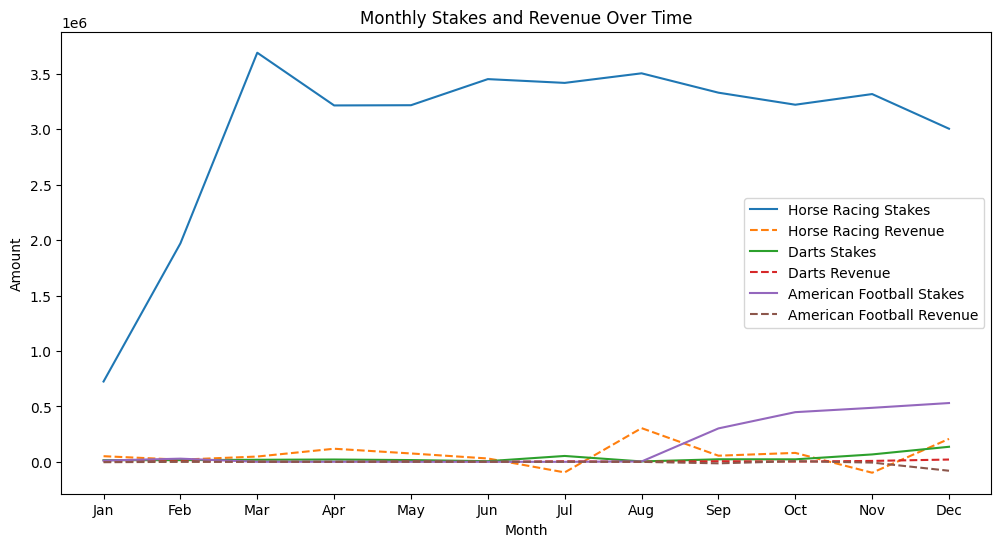

In [44]:
## Visualising darts, horse racing and American football due to above insights

plt.figure(figsize=(12, 6))

for sport in ['Horse Racing', 'Darts', 'American Football']:
    subset = trends[trends['sport_name'] == sport]
    plt.plot(subset['month'], subset['stakes'], label=f'{sport} Stakes')
    plt.plot(subset['month'], subset['revenue'], linestyle='--', label=f'{sport} Revenue')

plt.title('Monthly Stakes and Revenue Over Time')
plt.xlabel('Month')
plt.ylabel('Amount')
plt.legend()
plt.show()

Clear seasonality is visible for both darts and American football. 

In [45]:
# Max bets by sport 

max_bet_by_sport = bets_df.groupby(['sport_name', 'max_bet_yn'], observed=True).size().unstack(fill_value=0)
max_bet_by_sport_pct = max_bet_by_sport.div(max_bet_by_sport.sum(axis=1), axis=0) * 100

print(max_bet_by_sport_pct)

max_bet_yn             False      True 
sport_name                             
American Football  91.654731   8.345269
Basketball         80.882609  19.117391
Cricket            87.307410  12.692590
Darts              93.548387   6.451613
Golf               93.775354   6.224646
Greyhound Racing   91.350312   8.649688
Horse Racing       93.832855   6.167145
Rugby Union        93.811982   6.188018
Soccer             95.638476   4.361524
Tennis             86.405738  13.594262


Basketball, tennis and cricket have a higher rate of max bet users. 

Despite popularity, soccer has a low max bet usage. 

American football, greyhound racing, horse racing, darts, golf, rugby union all have max bet usage rates that are broadly in line with the calendar year norms. 

In [46]:
# Prematch vs in-play betting by sport 

sport_inplay = bets_df.groupby(['sport_name', 'in_play_yn'], observed=True)['stakes'].sum().unstack(fill_value=0)

sport_inplay['total'] = sport_inplay.sum(axis=1)
sport_inplay['prematch_pct'] = sport_inplay[False] / sport_inplay['total'] * 100
sport_inplay['inplay_pct'] = sport_inplay[True] / sport_inplay['total'] * 100
result = sport_inplay[['prematch_pct', 'inplay_pct', 'total']].sort_values(by='total', ascending=False)
result = result.drop(columns='total')

print(result)

in_play_yn         prematch_pct  inplay_pct
sport_name                                 
Horse Racing          96.871933    3.128074
Soccer                60.184925   39.815075
Tennis                27.403091   72.596909
American Football     89.230637   10.769363
Basketball            29.504892   70.495102
Cricket               11.625333   88.374672
Golf                  70.661865   29.338131
Greyhound Racing     100.000000    0.000000
Rugby Union           48.209438   51.790565
Darts                 60.385609   39.614391


There's a range of betting styles at play: 
- Horse racing, soccer, golf, greyhound racing, American football skew heavily towards prematch betting. 

- Tennis and cricket are dominated by in-play betting. 

- Rugny union, basketball and darts bettors have a roughly even split on in-play vs prematch betting. 


In [47]:
# Bet type percntages across the sports
bet_type_counts = bets_df.groupby(['sport_name', 'bet_type'], observed=True)['betcount'].sum().unstack(fill_value=0)
bet_type_percentages = bet_type_counts.div(bet_type_counts.sum(axis=1), axis=0) * 100
bet_type_percentages = bet_type_percentages.round(2)

print(bet_type_percentages)

bet_type           Multiple  Single
sport_name                         
American Football     26.49   73.51
Basketball            27.96   72.04
Cricket                8.36   91.64
Darts                 42.18   57.82
Golf                  11.65   88.35
Greyhound Racing      12.32   87.68
Horse Racing          21.90   78.10
Rugby Union           27.11   72.89
Soccer                37.48   62.52
Tennis                25.00   75.00


Single bets are dominating most sports but multiples are popular in a few (darts/soccer/basketball/american football/rugby union).

## Customer behaviour and trends 

In [48]:
# Aggregate total stakes, revenue, and betcount of each account
customer_agg = bets_df.groupby('account_id').agg({
    'stakes': 'sum',
    'revenue': 'sum',
    'betcount': 'sum'
}).reset_index()

In [49]:
# Top bettors by volume
top_bettors_by_stakes = customer_agg.sort_values('stakes', ascending=False).head(10)
print("Top 10 bettors by stakes:")
print(top_bettors_by_stakes)

Top 10 bettors by stakes:
       account_id        stakes       revenue  betcount
35687       36447  590933.81250 -87084.070312       163
1773         1811  523278.53125 -88184.375000       150
33293       34005  497125.75000  -7392.306152      2713
16179       16528  398293.09375  12117.344727      6281
25986       26532  392191.18750 -38525.769531      3769
9322         9512  387861.28125 -18743.626953      2396
24262       24775  342200.84375  -2308.264893      1582
5034         5129  334222.90625 -14669.608398       371
439           448  313524.59375  19544.375000      9283
14145       14452  311286.59375   1812.242432      5707


A mix of profitable and unprofitable bettors and also a variety in bet frequency. 

In [50]:
# Most profitable bettors 
top_bettors_by_revenue = customer_agg.sort_values('revenue', ascending=False).head(10)
print("\nTop 10 bettors by revenue:")
print(top_bettors_by_revenue)


Top 10 bettors by revenue:
       account_id         stakes       revenue  betcount
23296       23783   46378.984375  38713.355469        22
25283       25818  286898.937500  27884.474609      3045
1663         1700  175299.984375  22616.734375      1576
12697       12966  147068.140625  22532.841797      9375
8751         8925  181375.671875  21276.648438      7866
10891       11118  113319.734375  21242.228516      2508
17198       17564  109973.054688  20794.394531      1913
439           448  313524.593750  19544.375000      9283
38190       38992  114309.531250  18904.517578       303
31883       32566   75300.273438  17388.667969      4466


Very diverse betting profiles on show here - some have very high stakes and bet counts but others have fewer bets but still high profit. From a profitability perspective, these are the most valuable. 

For both this set of bettors and the preceding set, it would be interesting to explore who is flagged as a potential sharp. 

In [51]:
# Highest betcounts 
top_bettors_by_betcount = customer_agg.sort_values('betcount', ascending=False).head(10)
print("\nTop 10 bettors by betcount:")
print(top_bettors_by_betcount)


Top 10 bettors by betcount:
       account_id         stakes       revenue  betcount
21138       21580   32460.644531   3408.894043     34627
2976         3038   65388.746094  -4826.810547     18444
7671         7818   48961.207031   3931.742432     17844
27575       28158   34484.878906  10561.286133     17558
16512       16868   18840.562500   2676.379883     16214
24289       24804  121448.734375  17144.683594     15982
22864       23344   95865.359375   6653.398926     15752
2506         2563  111122.117188  -6515.566895     15133
18784       19171   45934.183594   5362.817871     14836
6107         6224   34321.476562   3920.262939     13199


In [52]:
# Sports that profitable bettors concentrate on
customer_summary = bets_df.groupby('account_id', observed=True).agg({
    'stakes': 'sum',
    'revenue': 'sum',
    'betcount': 'sum'
}).reset_index()
customer_summary['roi'] = customer_summary['revenue'] / customer_summary['stakes']

profitable_bettors = customer_summary[customer_summary['roi'] > 0]['account_id']
profitable_bets = bets_df[bets_df['account_id'].isin(profitable_bettors)]
profitable_sport_summary = profitable_bets.groupby('sport_name', observed=True)[['stakes', 'revenue']].sum()
profitable_sport_summary_formatted = profitable_sport_summary.copy()
profitable_sport_summary_formatted['stakes'] = profitable_sport_summary_formatted['stakes'].apply(lambda x: f'{x/1_000_000:.2f}M')
profitable_sport_summary_formatted['revenue'] = profitable_sport_summary_formatted['revenue'].apply(lambda x: f'{x/1_000_000:.2f}M')

print("Stakes and Revenue by Sport for Profitable Bettors:")
print(profitable_sport_summary_formatted.sort_values(by='stakes', ascending=False))

Stakes and Revenue by Sport for Profitable Bettors:
                   stakes revenue
sport_name                       
Horse Racing       22.45M   3.09M
Tennis              2.20M   0.20M
Soccer             11.20M   2.48M
American Football   0.93M   0.06M
Golf                0.67M   0.16M
Greyhound Racing    0.62M   0.09M
Cricket             0.61M   0.05M
Basketball          0.53M   0.05M
Rugby Union         0.45M   0.07M
Darts               0.23M   0.05M


The **profitable bettors are focused on horse racing and soccer**, with the highest stakes and revenue totals. These may be the most strategic for them. 

Tennis, American football, golf and greyhound racing all have smaller but meaningful stakes among the profitable bettors. Darts and rugby union have smaller stakes again but still a positive return. 

To tie this back to previous charts, two thirds of horse racing stakes overall are placed by profitable bettors. 

In [53]:
# Cross sport behaviour for profitable bettors 

sport_diversity = profitable_bets.groupby('account_id', observed=True)['sport_name'].nunique().reset_index()
sport_diversity.columns = ['account_id', 'num_sports']
sport_counts = sport_diversity['num_sports'].value_counts().sort_index()

sport_percentages = (sport_counts / sport_counts.sum() * 100).round(2)
sport_distribution = pd.DataFrame({
    'num_sports': sport_counts.index,
    'num_bettors': sport_counts.values,
    'percentage': sport_percentages.values
})

print("Amount of sports profitable bettors bet on:")
print(sport_distribution)

Amount of sports profitable bettors bet on:
   num_sports  num_bettors  percentage
0           1        13029       45.75
1           2         7546       26.50
2           3         3778       13.27
3           4         1957        6.87
4           5         1021        3.59
5           6          563        1.98
6           7          282        0.99
7           8          184        0.65
8           9           86        0.30
9          10           33        0.12


The cross-sport betting behaviour shows that almost half are specialists in one sport. Around a third bet on two or three sports, showing some diversity. 

It's extremely rare for them to diversify across multiple sports. This suggests that marketing to these clients should consider emphasising their key sports.

In [54]:
# Do profitable bettors use in play or prematch bets 

profitable_bettors = customer_summary[customer_summary['roi'] > 0]['account_id']
profitable_bets = bets_df[bets_df['account_id'].isin(profitable_bettors)]

profitable_inplay = profitable_bets.groupby(['sport_name', 'in_play_yn'], observed=True)['betcount'].sum().unstack(fill_value=0)

prematch = profitable_inplay[False]
inplay = profitable_inplay[True]
profitable_inplay['total_bets'] = prematch + inplay
profitable_inplay['prematch_pct'] = prematch / profitable_inplay['total_bets'] * 100
profitable_inplay['inplay_pct'] = inplay / profitable_inplay['total_bets'] * 100
result = profitable_inplay.sort_values(by='total_bets', ascending=False)[['prematch_pct', 'inplay_pct']]

print(result)

in_play_yn         prematch_pct  inplay_pct
sport_name                                 
Horse Racing          97.683602    2.316398
Soccer                68.594789   31.405211
Tennis                22.088463   77.911537
Greyhound Racing     100.000000    0.000000
Golf                  67.871043   32.128957
Basketball            52.385571   47.614429
Cricket               24.766525   75.233475
Rugby Union           74.988427   25.011573
American Football     85.957804   14.042196
Darts                 75.053443   24.946557


The majority in horse racing, greyhound racing, soccer and golf are placing prematch bets. 

Tennis, cricket, rugby union, american football and darts show the opposite. 

There is an even split in basketball.

In [55]:
# Max bets and profitable bettors 

max_bet_sport = profitable_bets.groupby(['sport_name', 'max_bet_yn']).size().unstack(fill_value=0)
max_bet_sport['total_bets'] = max_bet_sport.sum(axis=1)
max_bet_sport['max_bet_pct'] = max_bet_sport[True] / max_bet_sport['total_bets'] * 100

print(max_bet_sport[['max_bet_pct']].sort_values(by='max_bet_pct', ascending=False))

max_bet_yn         max_bet_pct
sport_name                    
Basketball            8.927668
Cricket               8.301323
Tennis                7.875648
Greyhound Racing      4.844785
American Football     4.786867
Golf                  4.525051
Horse Racing          4.351147
Darts                 4.214223
Soccer                2.950307
Rugby Union           2.638984


/var/folders/c4/x7n6xmhs4cx6kr_xww7pf40h0000gn/T/ipykernel_32145/461792050.py:3: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  max_bet_sport = profitable_bets.groupby(['sport_name', 'max_bet_yn']).size().unstack(fill_value=0)


Across the sports, very few profitable bettors are playing max bets. 

In [56]:
# Free bet usage among profitable bettors

free_bet_sport = profitable_bets.groupby(['sport_name', 'freebet_used_yn'], observed=True).size().unstack(fill_value=0)

free_bet_sport['total_bets'] = free_bet_sport.sum(axis=1)
free_bet_sport['free_bet_pct'] = free_bet_sport[True] / free_bet_sport['total_bets'] * 100

print(free_bet_sport[['free_bet_pct']].sort_values(by='free_bet_pct', ascending=False))

freebet_used_yn    free_bet_pct
sport_name                     
Horse Racing          19.328362
Soccer                12.457250
Greyhound Racing      10.001299
Tennis                 9.077720
Golf                   5.477216
American Football      5.035177
Basketball             4.944360
Cricket                4.929577
Darts                  3.906936
Rugby Union            2.616169


Profitable bettors in horse racing and soccer are using free bets, perhaps to reduce risk. It is clearly an important tool for these popular markets.

Other sports show lower rates of use. This could be due to lower promotions. 

In [57]:
# Average bet size by customer 

overall_avg_bet = customer_agg['stakes'].sum() / customer_agg['betcount'].sum()
print(f'Overall average bet in GDP: {overall_avg_bet:.2f}')

Overall average bet in GDP: 11.24


In [58]:
# Average custoner bet by sport 

sport_agg = bets_df.groupby('sport_name', observed=True).agg({
    'stakes': 'sum',
    'betcount': 'sum'
}).reset_index()

sport_agg['avg_bet_size'] = sport_agg['stakes'] / sport_agg['betcount']

print(sport_agg[['sport_name', 'avg_bet_size']].sort_values(by='avg_bet_size', ascending=False))

          sport_name  avg_bet_size
0  American Football     58.565356
2            Cricket     33.014176
1         Basketball     26.847732
9             Tennis     25.857656
7        Rugby Union     21.815041
3              Darts     16.324898
4               Golf     11.415016
6       Horse Racing     11.318143
5   Greyhound Racing      9.740015
8             Soccer      8.450600


When compared to the average customer bet, American Football bettors are placing largest average bets by quite a lot. While horse racing and soccer have highest total overall stakes, they have much smaller average bet sizes. The bettors are likely placing multiple small bets rather than a few big ones. 

Key takeaway: big bettors are clustered towards more niche and growth sports. 

In [59]:
# Average bet size over the calendar year 
monthly_totals = bets_df.groupby('month', observed=True).agg({'stakes': 'sum', 'betcount': 'sum'})
monthly_totals['avg_bet_size'] = monthly_totals['stakes'] / monthly_totals['betcount']
print(monthly_totals[['avg_bet_size']].applymap(lambda x: f'GDP {x:.2f}'))

      avg_bet_size
month             
Jan       GDP 9.88
Feb       GDP 8.50
Mar      GDP 10.00
Apr       GDP 9.39
May      GDP 12.47
Jun      GDP 10.62
Jul      GDP 12.36
Aug      GDP 11.33
Sep      GDP 12.47
Oct      GDP 12.46
Nov      GDP 13.29
Dec      GDP 12.18


/var/folders/c4/x7n6xmhs4cx6kr_xww7pf40h0000gn/T/ipykernel_32145/896452471.py:4: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  print(monthly_totals[['avg_bet_size']].applymap(lambda x: f'GDP {x:.2f}'))


Punters generally bet smaller amounts at the start of the year, although betting amounts remained broadly similar. 

In [60]:
# Average amount of bets placed per year  

monthly_bets = bets_df.groupby(['month', 'account_id'], observed=True)['betcount'].sum().reset_index()
monthly_summary = monthly_bets.groupby('month', observed=True).agg(
    total_bets=('betcount', 'sum'),
    unique_accounts=('account_id', 'nunique')
).reset_index()

monthly_summary['avg_bets_per_account'] = monthly_summary['total_bets'] / monthly_summary['unique_accounts']

monthly_summary['month'] = monthly_summary['month'].astype(str)
print(monthly_summary[['month', 'avg_bets_per_account']])

   month  avg_bets_per_account
0    Jan             21.778931
1    Feb             43.315342
2    Mar             39.294858
3    Apr             31.369390
4    May             35.620337
5    Jun             35.558215
6    Jul             31.773981
7    Aug             39.913033
8    Sep             40.538512
9    Oct             40.337693
10   Nov             40.284746
11   Dec             40.088309


Customer engagement is lowest in January, with February showing the highest engagement. Engagement is then relatively stable across the calendar year. 

When exmained along with the earlier chart on monthly bet count, January having both the lowest average bets and lowest total bet count indicates an overall lower engagement. Stakes are at their lowest in this time, so may indicate low-volume betting that is still profitable. Volume overall increases in March onwards but profitability varies, even though average bet rate remains largely the same.

August and October are high volume and margin events whereas November maintains high activity rates but reords a loss in revenue. 

In [61]:
# Users who were active in every calendar month

account_months = bets_df[['account_id', 'month']].drop_duplicates()

monthly_activity_count = account_months.groupby('account_id')['month'].nunique().reset_index()
monthly_activity_count.columns = ['account_id', 'active_months']
fully_active_accounts = monthly_activity_count[monthly_activity_count['active_months'] == 12]
total_accounts = monthly_activity_count.shape[0]

print("Number of accounts active in every month:", fully_active_accounts.shape[0])
print("Percentage of total accounts:", round((fully_active_accounts.shape[0] / total_accounts) * 100, 2), "%")

Number of accounts active in every month: 2697
Percentage of total accounts: 6.88 %


## November anomalies 

In [62]:
# Individual betting stakes across sports 

nov_individual_sport_revenue = bets_df.groupby('sport_name', observed=True)['revenue'].sum().sort_values()
nov_df = nov_individual_sport_revenue.reset_index()
nov_df.columns = ['Sport', 'Revenue']
nov_df['Revenue'] = nov_df['Revenue'].map(lambda x: f"GDP {x:,.2f}")

print(nov_df)

               Sport           Revenue
0  American Football    GDP -99,287.93
1               Golf    GDP -55,784.57
2         Basketball    GDP -33,634.99
3            Cricket    GDP -11,137.45
4        Rugby Union     GDP 49,504.18
5   Greyhound Racing     GDP 49,985.04
6              Darts     GDP 52,097.24
7             Tennis     GDP 66,877.95
8       Horse Racing    GDP 794,133.06
9             Soccer  GDP 1,226,755.25


November's revenue drop is driven by large losses in basketball, American football, golf and cricket. 

Soccer and horse racing provided the highest positive revenues. Tennis, rugby union, darts and greyhound racing are also profitable (albeit smaller).

In [63]:
# Max bet usage in November
# Overall avg mx bet in Nov = 7%

nov_bets = bets_df[bets_df['month'] == 'Nov']
max_bet_counts = nov_bets.groupby(['sport_name', 'max_bet_yn'], observed=True).size().unstack(fill_value=0)

max_bet_percent = (max_bet_counts[True] / (max_bet_counts[True] + max_bet_counts[False])) * 100
max_bet_percent = max_bet_percent.sort_values(ascending=False).round(2)

print(max_bet_percent)

sport_name
Basketball           26.53
Cricket              19.53
Tennis               16.80
Darts                11.88
Greyhound Racing     11.66
Golf                 11.06
American Football     9.23
Horse Racing          6.63
Soccer                5.36
Rugby Union           4.80
dtype: float64


Basketball, cricket, American football and golf (as well as having incurred losses) saw higher rates of max bet usage by clients than the average. 

Overall, the minor sports saw a higher rate of max bet usage than the average.

Soccer and horse racing punters did not deviate from their usual pattern - they typically avoid using max bets. So, the upswing in max bet rates for Nov was caused by ultimately less profitable sports.

In [64]:
# In play betting profitability in November 
# Average rate of in-play/pre-match rates was consistent with yearly average 

nov_bets = bets_df[bets_df['month'] == 'Nov']
nov_profitability = nov_bets.groupby('in_play_yn').agg({
    'revenue': 'sum',
    'stakes': 'sum'
})
nov_profitability['margin_percent'] = (nov_profitability['revenue'] / nov_profitability['stakes']) * 100

print(nov_profitability)

                 revenue      stakes  margin_percent
in_play_yn                                          
False      -79435.703125  5303139.50       -1.497900
True        25331.197266  1092935.75        2.317721


In-play betting was profitable but pre-match was losing money. This is not in line with the overall yearly trend, which was positive. 

In [65]:
# prematch vs in-play betting habits by sport in november 

nov_df = bets_df[bets_df['month'] == 'Nov']
nov_sport_inplay = nov_df.groupby(['sport_name', 'in_play_yn'], observed=True)['stakes'].sum().unstack(fill_value=0)
nov_sport_inplay['total_stakes'] = nov_sport_inplay.sum(axis=1)

nov_sport_inplay['prematch_pct'] = 100 * nov_sport_inplay[False] / nov_sport_inplay['total_stakes']
nov_sport_inplay['inplay_pct'] = 100 * nov_sport_inplay[True] / nov_sport_inplay['total_stakes']
result = nov_sport_inplay[['prematch_pct', 'inplay_pct']].sort_values(by='inplay_pct', ascending=False)

print(result)

in_play_yn         prematch_pct  inplay_pct
sport_name                                 
Tennis                11.412717   88.587288
Cricket               11.653279   88.346718
Rugby Union           51.389400   48.610596
Basketball            52.607857   47.392139
Darts                 57.483536   42.516468
Soccer                71.050247   28.949755
Golf                  78.562401   21.437607
American Football     90.279045    9.720955
Horse Racing          98.044128    1.955875
Greyhound Racing     100.000000    0.000000


This is quite consistent with the broader yearly pattern, as seen previously by sport. 

In [66]:
# Average bet size by sport in November 
# Overall average bet size: 13.28

november_bets = bets_df[bets_df['month'] == 'Nov']
sport_avg_nov = november_bets.groupby('sport_name', observed=True).agg({'stakes': 'sum', 'betcount': 'sum'})
sport_avg_nov['avg_bet_size'] = sport_avg_nov['stakes'] / sport_avg_nov['betcount']
print(sport_avg_nov[['avg_bet_size']].applymap(lambda x: f'GDP {x:.2f}'))

                  avg_bet_size
sport_name                    
American Football    GDP 66.33
Basketball           GDP 20.24
Cricket              GDP 29.34
Darts                GDP 20.38
Golf                 GDP 10.71
Greyhound Racing     GDP 10.17
Horse Racing         GDP 12.72
Rugby Union          GDP 16.66
Soccer               GDP 10.63
Tennis               GDP 19.20


/var/folders/c4/x7n6xmhs4cx6kr_xww7pf40h0000gn/T/ipykernel_32145/2436715334.py:7: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  print(sport_avg_nov[['avg_bet_size']].applymap(lambda x: f'GDP {x:.2f}'))


American football, cricket, basketball had larger than average bets but produced losses. There appears to be a pattern of riskier behaviour in November. 

Soccer, horse and greyhound racing all placing below average/average bet sizes but returning revenue. 

Interestingly, darts, tennis and rugby union all have higher than average bet sizes and are profitable. 

In [67]:
# Bet type popularity by sport in November 

nov_bets = bets_df[bets_df['month'] == 'Nov']
nov_bet_type = nov_bets.groupby(['sport_name', 'bet_type'], observed=True)['betcount'].sum().unstack(fill_value=0)
nov_bet_type_pct = nov_bet_type.div(nov_bet_type.sum(axis=1), axis=0) * 100
nov_bet_type_pct = nov_bet_type_pct.round(2)

print(nov_bet_type_pct)

bet_type           Multiple  Single
sport_name                         
American Football     27.07   72.93
Basketball            31.17   68.83
Cricket               13.41   86.59
Darts                 48.52   51.48
Golf                  15.85   84.15
Greyhound Racing      15.13   84.87
Horse Racing          23.18   76.82
Rugby Union           32.59   67.41
Soccer                50.16   49.84
Tennis                26.22   73.78


Some slight deviations from the yearly trend: 
- Multiple bet usage is up in loss-heavy sports (American football and basketball), and these also saw more multiple bets than usual. 
- No big change in horse racing, cricket, tennis etc. 

In [68]:
# Bet type profitability in November

nov_bet_profit = nov_bets.groupby('bet_type', observed=True)[['stakes', 'revenue']].sum()
nov_bet_profit['profit_margin'] = nov_bet_profit['revenue'] / nov_bet_profit['stakes']
print(nov_bet_profit.round(4))

               stakes        revenue  profit_margin
bet_type                                           
Multiple   961330.375   75353.843750         0.0784
Single    5434745.000 -129458.351562        -0.0238


There are relatively small stakes in the multiples but a small profit margin. However, singles had huge stakes but negative profit margin. 

Therefore, much of the revenue drop could be driven by losses on these single bets. 

In [69]:
# Singles betting on the loss making sports

loss_sports = ['American Football', 'Golf', 'Basketball', 'Cricket']

nov_singles_loss_sports = bets_df[
    (bets_df['month'] == 'Nov') &
    (bets_df['sport_name'].isin(loss_sports)) &
    (bets_df['bet_type'] == 'Single')
]

summary = nov_singles_loss_sports.groupby('sport_name').agg({
    'stakes': 'sum',
    'revenue': 'sum',
    'betcount': 'sum'
}).reset_index()

summary['profit_margin'] = summary['revenue'] / summary['stakes']
print(summary)


          sport_name         stakes      revenue  betcount  profit_margin
0  American Football  463610.718750  5855.940430      5358       0.012631
1         Basketball  151918.812500 -5656.879883      5720      -0.037236
2            Cricket  139408.171875 -2610.068359      4159      -0.018722
3              Darts       0.000000     0.000000         0            NaN
4               Golf   47885.414062  1896.161743      4348       0.039598
5   Greyhound Racing       0.000000     0.000000         0            NaN
6       Horse Racing       0.000000     0.000000         0            NaN
7        Rugby Union       0.000000     0.000000         0            NaN
8             Soccer       0.000000     0.000000         0            NaN
9             Tennis       0.000000     0.000000         0            NaN


/var/folders/c4/x7n6xmhs4cx6kr_xww7pf40h0000gn/T/ipykernel_32145/1849944305.py:11: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  summary = nov_singles_loss_sports.groupby('sport_name').agg({


American football: singles bets here are making a slight profit (so loss is coming from multiples). 

Basketball and cricket: singles are losing money. 


In [70]:
# Multiples betting on the loss making sports

nov_multiple_loss_sports = bets_df[
    (bets_df['month'] == 'Nov') &
    (bets_df['sport_name'].isin(loss_sports)) &
    (bets_df['bet_type'] == 'Multiple')
]

summary = nov_multiple_loss_sports.groupby('sport_name').agg({
    'stakes': 'sum',
    'revenue': 'sum',
    'betcount': 'sum'
}).reset_index()

summary['profit_margin'] = summary['revenue'] / summary['stakes']
print(summary)

          sport_name        stakes       revenue  betcount  profit_margin
0  American Football  23682.722656 -12584.094727      1989      -0.531362
1         Basketball  16234.614258   6049.737793      2590       0.372644
2            Cricket   1498.279785   -623.302795       644      -0.416012
3              Darts      0.000000      0.000000         0            NaN
4               Golf   7463.957031 -51875.570312       819      -6.950143
5   Greyhound Racing      0.000000      0.000000         0            NaN
6       Horse Racing      0.000000      0.000000         0            NaN
7        Rugby Union      0.000000      0.000000         0            NaN
8             Soccer      0.000000      0.000000         0            NaN
9             Tennis      0.000000      0.000000         0            NaN


/var/folders/c4/x7n6xmhs4cx6kr_xww7pf40h0000gn/T/ipykernel_32145/3537035747.py:9: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  summary = nov_multiple_loss_sports.groupby('sport_name').agg({


Multiple bets are highly unprofitable in American Football, making a huge loss of -53%. Generally, riskier player behaviour (high average bet size etc) hurt profitability.

Multiples in basketball are making a profit. 

In both golf and cricket, multiple bets are unprofitable.

## Saving cleaned datafiles

In [71]:
print(customers_df.head())

   account_id     marketing_channel account_open_datetime residence_country  \
0           1                   SEO   2015-03-19 18:41:41           Ireland   
1           2  PPC (inc Competitor)   2018-04-14 11:13:03    United Kingdom   
2           3                   SEO   2015-04-11 09:35:37    United Kingdom   
3           4                Direct   2016-08-21 15:01:47    United Kingdom   
4           5                   SEO   2006-10-05 19:25:48           Ireland   

  sharp_yn   country_group  account_open_year  account_open_month  sharp_flag  
0        N         Ireland               2015                   3           0  
1        N  United Kingdom               2018                   4           0  
2        N  United Kingdom               2015                   4           0  
3        N  United Kingdom               2016                   8           0  
4        N         Ireland               2006                  10           0  


In [72]:
# Removing residence_country and account_open_datetime to reduce load 

customers_df.drop(columns=['account_open_datetime', 'residence_country'], inplace=True)
print(customers_df.head())

   account_id     marketing_channel sharp_yn   country_group  \
0           1                   SEO        N         Ireland   
1           2  PPC (inc Competitor)        N  United Kingdom   
2           3                   SEO        N  United Kingdom   
3           4                Direct        N  United Kingdom   
4           5                   SEO        N         Ireland   

   account_open_year  account_open_month  sharp_flag  
0               2015                   3           0  
1               2018                   4           0  
2               2015                   4           0  
3               2016                   8           0  
4               2006                  10           0  


In [73]:
# Saving updated customers_df

customers_df.to_csv('sportsbook_customers.csv', index=False)

In [74]:
print(bets_df.head())

  month  account_id    sport_name  in_play_yn  freebet_used_yn  bet_type  \
0   Mar       26928  Horse Racing       False            False    Single   
1   Jul         710          Golf       False            False    Single   
2   Nov       12592        Soccer       False            False  Multiple   
3   Nov         349        Soccer       False            False    Single   
4   Nov       15999        Soccer       False            False    Single   

   max_bet_yn         market_group     stakes    revenue  betcount  
0       False   Derivative Markets   9.282234   9.282234         1  
1       False             Outright   8.715135   8.715135         1  
2       False           Match Odds   9.395684   9.395684         2  
3        True  Commercial Specials  18.583441  18.583441         1  
4       False   Over/Under Markets  16.669624   8.334812         2  


In [75]:
# Saving updated bets_df

bets_df.to_csv('sportsbook_bets.csv', index=False)